In [2]:
import numpy as np
from PIL import Image, ImageFilter, ImageEnhance
import cv2

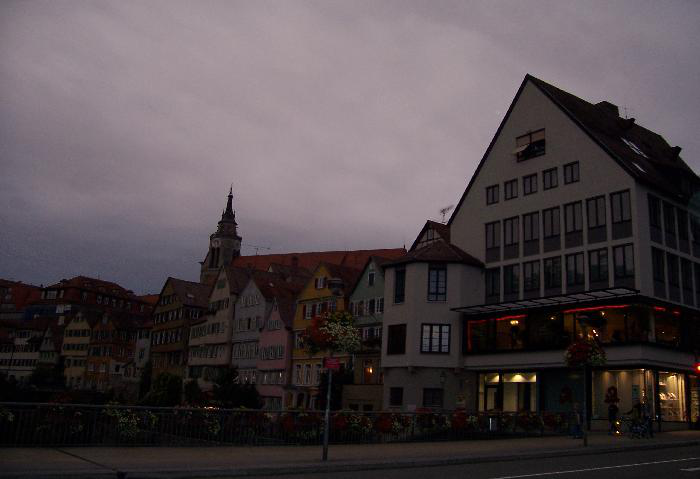

In [3]:
im = Image.open("images_original/011.jpg")
im

In [4]:
imEnhancer = ImageEnhance.Brightness(im)

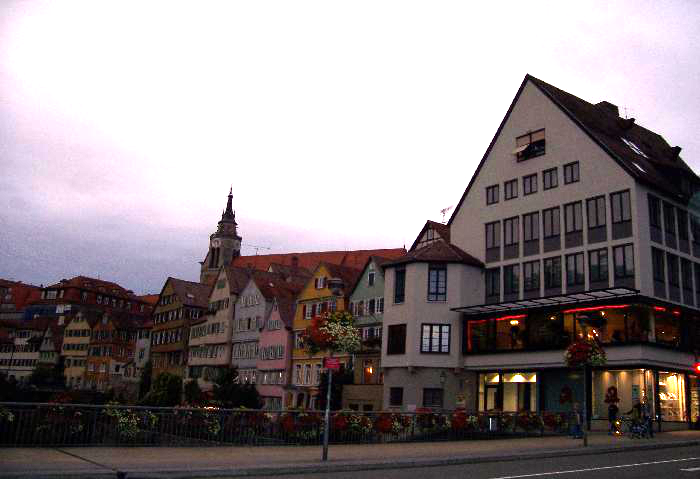

In [5]:
imEnhancer.enhance(2)

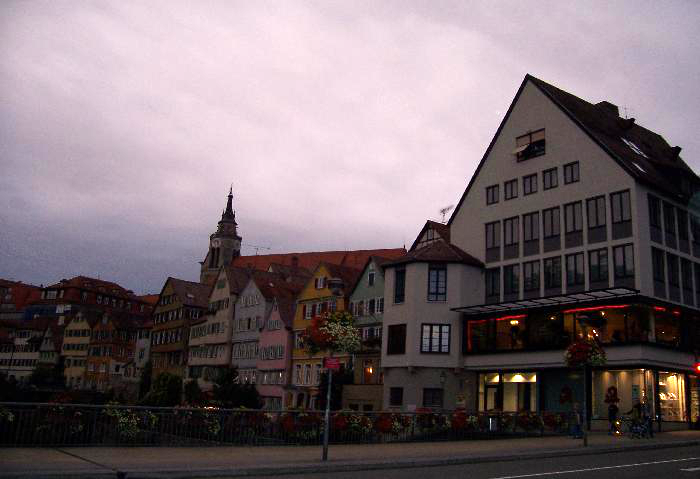

In [6]:
imEnhancer.enhance(1.5)

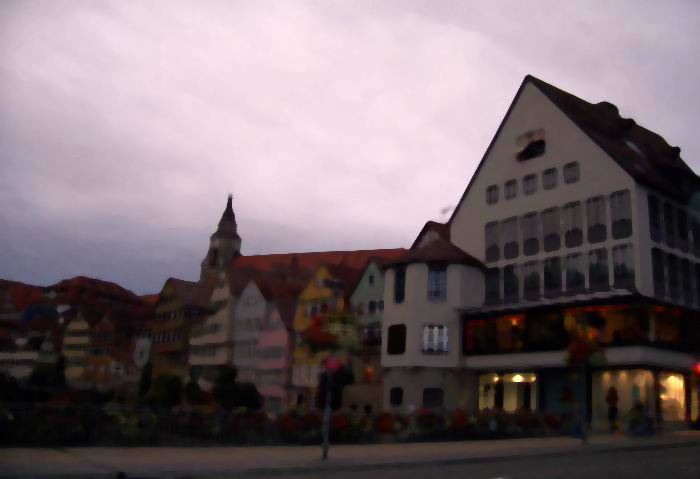

In [7]:
imEnhancer.enhance(1.5).filter(ImageFilter.MedianFilter(7))

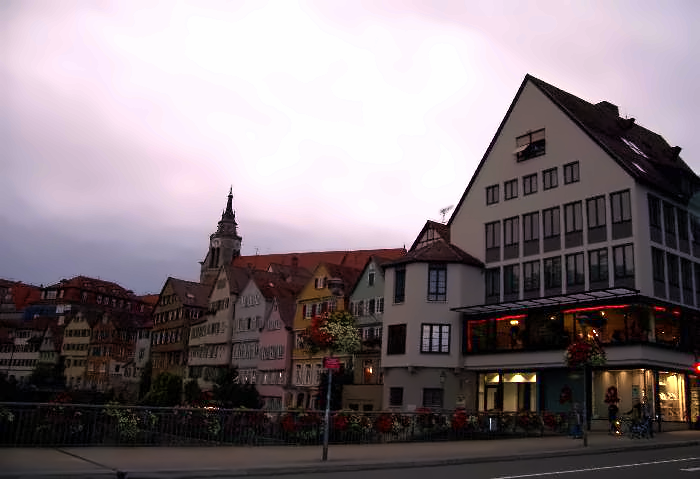

In [8]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=5, hColor=7)
Image.fromarray(imArray)

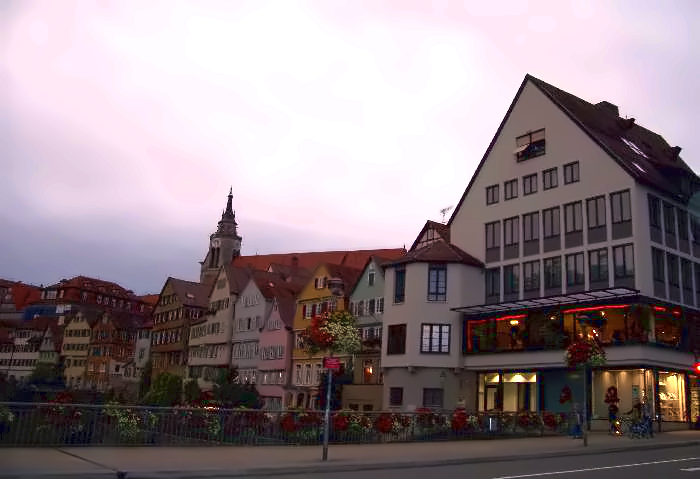

In [23]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=7, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)
Image.fromarray(imArray)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


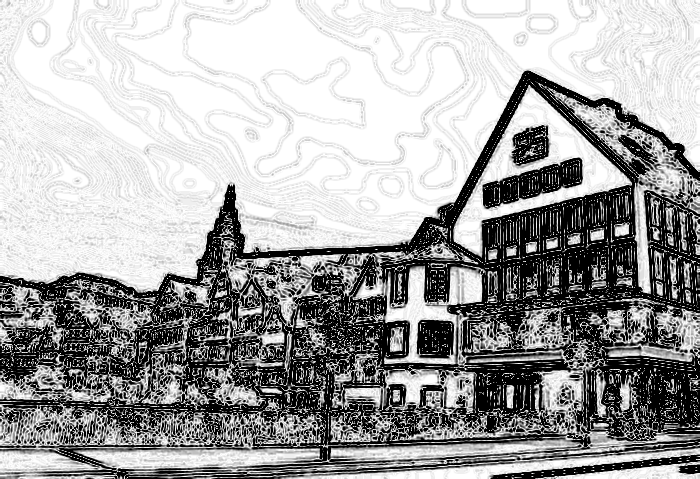

In [10]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=5, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)

imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
imArray = cv2.GaussianBlur(imArray, ksize=(3,3), sigmaX=5)
imCanny = cv2.Canny(imArray, 50, 200)
imCanny = cv2.convertScaleAbs(imCanny)
imLaplacian =cv2.Laplacian(imArray, cv2.CV_16S, ksize=5)
imLaplacian = cv2.convertScaleAbs(imLaplacian)
dialated = cv2.dilate(imCanny, kernel=np.ones((3,3)), iterations=1)
dialated = cv2.bitwise_not(dialated)
print(dialated)
Image.fromarray(cv2.bitwise_not(imLaplacian))

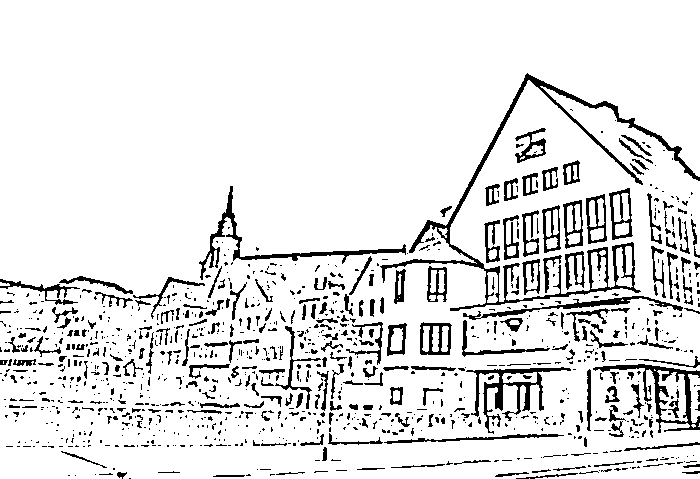

In [11]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=5, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)

imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
imArray = cv2.GaussianBlur(imArray, ksize=(3,3), sigmaX=5)
imCanny = cv2.Canny(imArray, 50, 200)
imCanny = cv2.convertScaleAbs(imCanny)
imLaplacian =cv2.Laplacian(imArray, cv2.CV_16S, ksize=3)
edges = cv2.adaptiveThreshold(imArray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
Image.fromarray(edges)

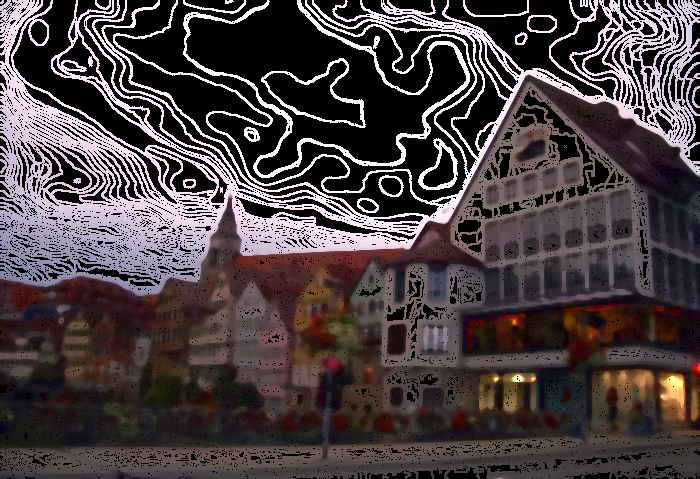

In [29]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=5, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)
imArrayBlur = cv2.medianBlur(imArray, 7)

imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
# imArray = cv2.GaussianBlur(imArray, ksize=(3,3), sigmaX=3)
imCanny = cv2.Canny(imArray, 50, 200)
imCanny = cv2.convertScaleAbs(imCanny)
imLaplacian =cv2.Laplacian(imArray, cv2.CV_16S, ksize=3)
imLaplacian = cv2.convertScaleAbs(imLaplacian)
dialated = cv2.dilate(imCanny, kernel=np.ones((3,3)), iterations=1)
dialated = cv2.bitwise_not(dialated)
edges = cv2.adaptiveThreshold(imArray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

Image.fromarray(cv2.bitwise_and(imArrayBlur, imArrayBlur, mask=imLaplacian))

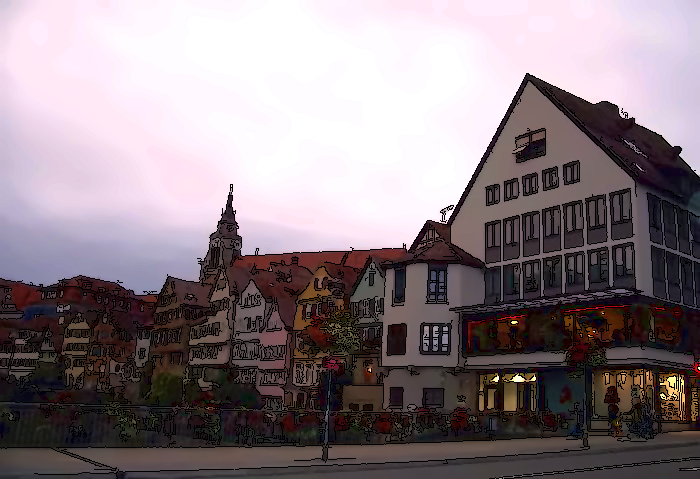

In [13]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=5, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)
imArrayBlur = cv2.medianBlur(imArray, 3)

imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
# imArray = cv2.GaussianBlur(imArray, ksize=(3,3), sigmaX=3)
imCanny = cv2.Canny(imArray, 40, 200)
imCanny = cv2.convertScaleAbs(imCanny)
imLaplacian =cv2.Laplacian(imArray, cv2.CV_16S, ksize=3)
imLaplacian = cv2.convertScaleAbs(imLaplacian)
dialated = cv2.dilate(imCanny, kernel=np.ones((3,3)), iterations=1)
dialated = cv2.bitwise_not(dialated)
edges = cv2.adaptiveThreshold(imArray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 5)

Image.fromarray(cv2.bitwise_and(imArrayBlur, imArrayBlur, mask=cv2.bitwise_not(imCanny)))

In [14]:
imArray = np.asarray(imEnhancer.enhance(1.7))
# cv2.fastNlMeansDenoisingColored(imArray, imArray, h=5, hColor=7)
# imArray = cv2.stylization(imArray, sigma_s=60, sigma_r=0.6)
(dstGray, dstColor) = cv2.pencilSketch(imArray, sigma_s=30, sigma_r=0.3, shade_factor=0.05)
cv2.imwrite("dstgray.png",dstGray)

True

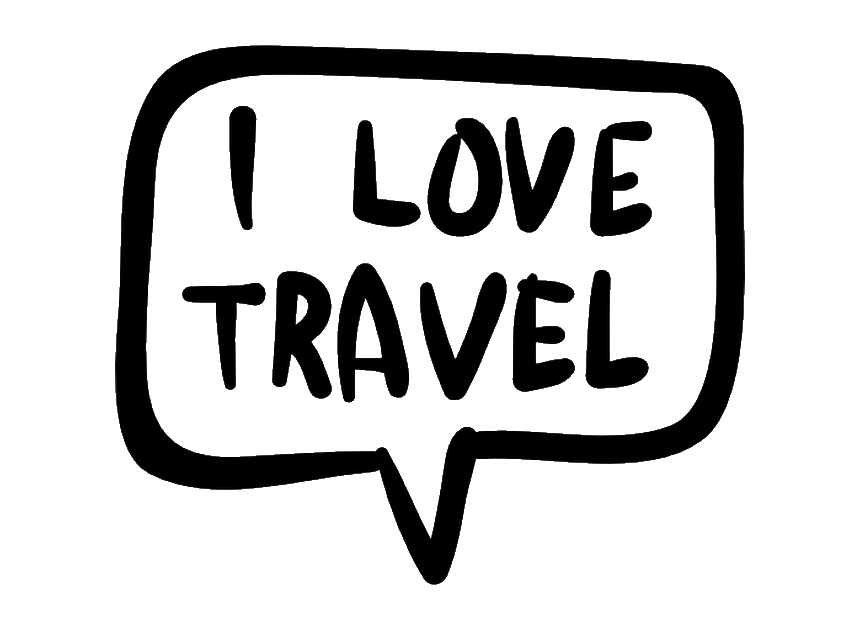

In [15]:
ilovetravel = Image.open("480-4807393_i-love-travel-in-handmade-speech-bubble-free.png")
#https://www.kindpng.com/picc/m/480-4807393_i-love-travel-in-handmade-speech-bubble-free.png
ilovetravel = np.asarray(ilovetravel)
# print(ilovetravel)
for i in range(ilovetravel.shape[0]):
    for j in range(ilovetravel.shape[1]):
        if (ilovetravel[i][j][0] >127 and ilovetravel[i][j][1] >127 and ilovetravel[i][j][2] >127 ) :
            ilovetravel[i][j][3] = 0

Image.fromarray(ilovetravel)

In [16]:
ilovetravel = Image.open("480-4807393_i-love-travel-in-handmade-speech-bubble-free.png")
#https://www.kindpng.com/picc/m/480-4807393_i-love-travel-in-handmade-speech-bubble-free.png
ilovetravel = np.asarray(ilovetravel)
# print(ilovetravel)
for i in range(ilovetravel.shape[0]):
    for j in range(ilovetravel.shape[1]):
        if (ilovetravel[i][j][0] >127 and ilovetravel[i][j][1] >127 and ilovetravel[i][j][2] >127 ) :
            ilovetravel[i][j][3] = 0
ilovetravel = Image.fromarray(ilovetravel)
ilovetravel = ilovetravel.resize((int(ilovetravel.width * 0.3), int(ilovetravel.height * 0.3)))


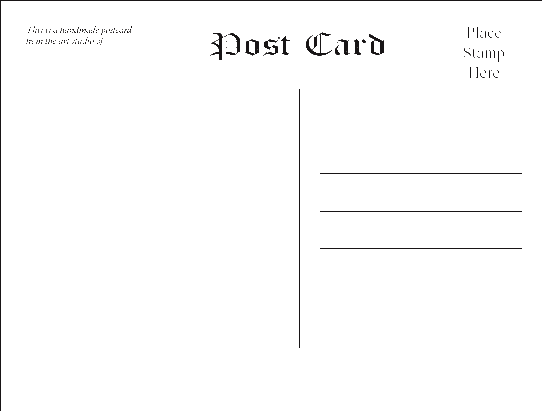

In [17]:
postcard = Image.open("postcard.jpg")
postcard = postcard.convert("RGBA")
postcard = np.asarray(postcard)
for i in range(postcard.shape[0]):
    for j in range(postcard.shape[1]):
        if postcard[i][j][0] >127 and postcard[i][j][1] >127 and postcard[i][j][2] >127:
            postcard[i][j][3] = 0
postcard = Image.fromarray(postcard)
postcard

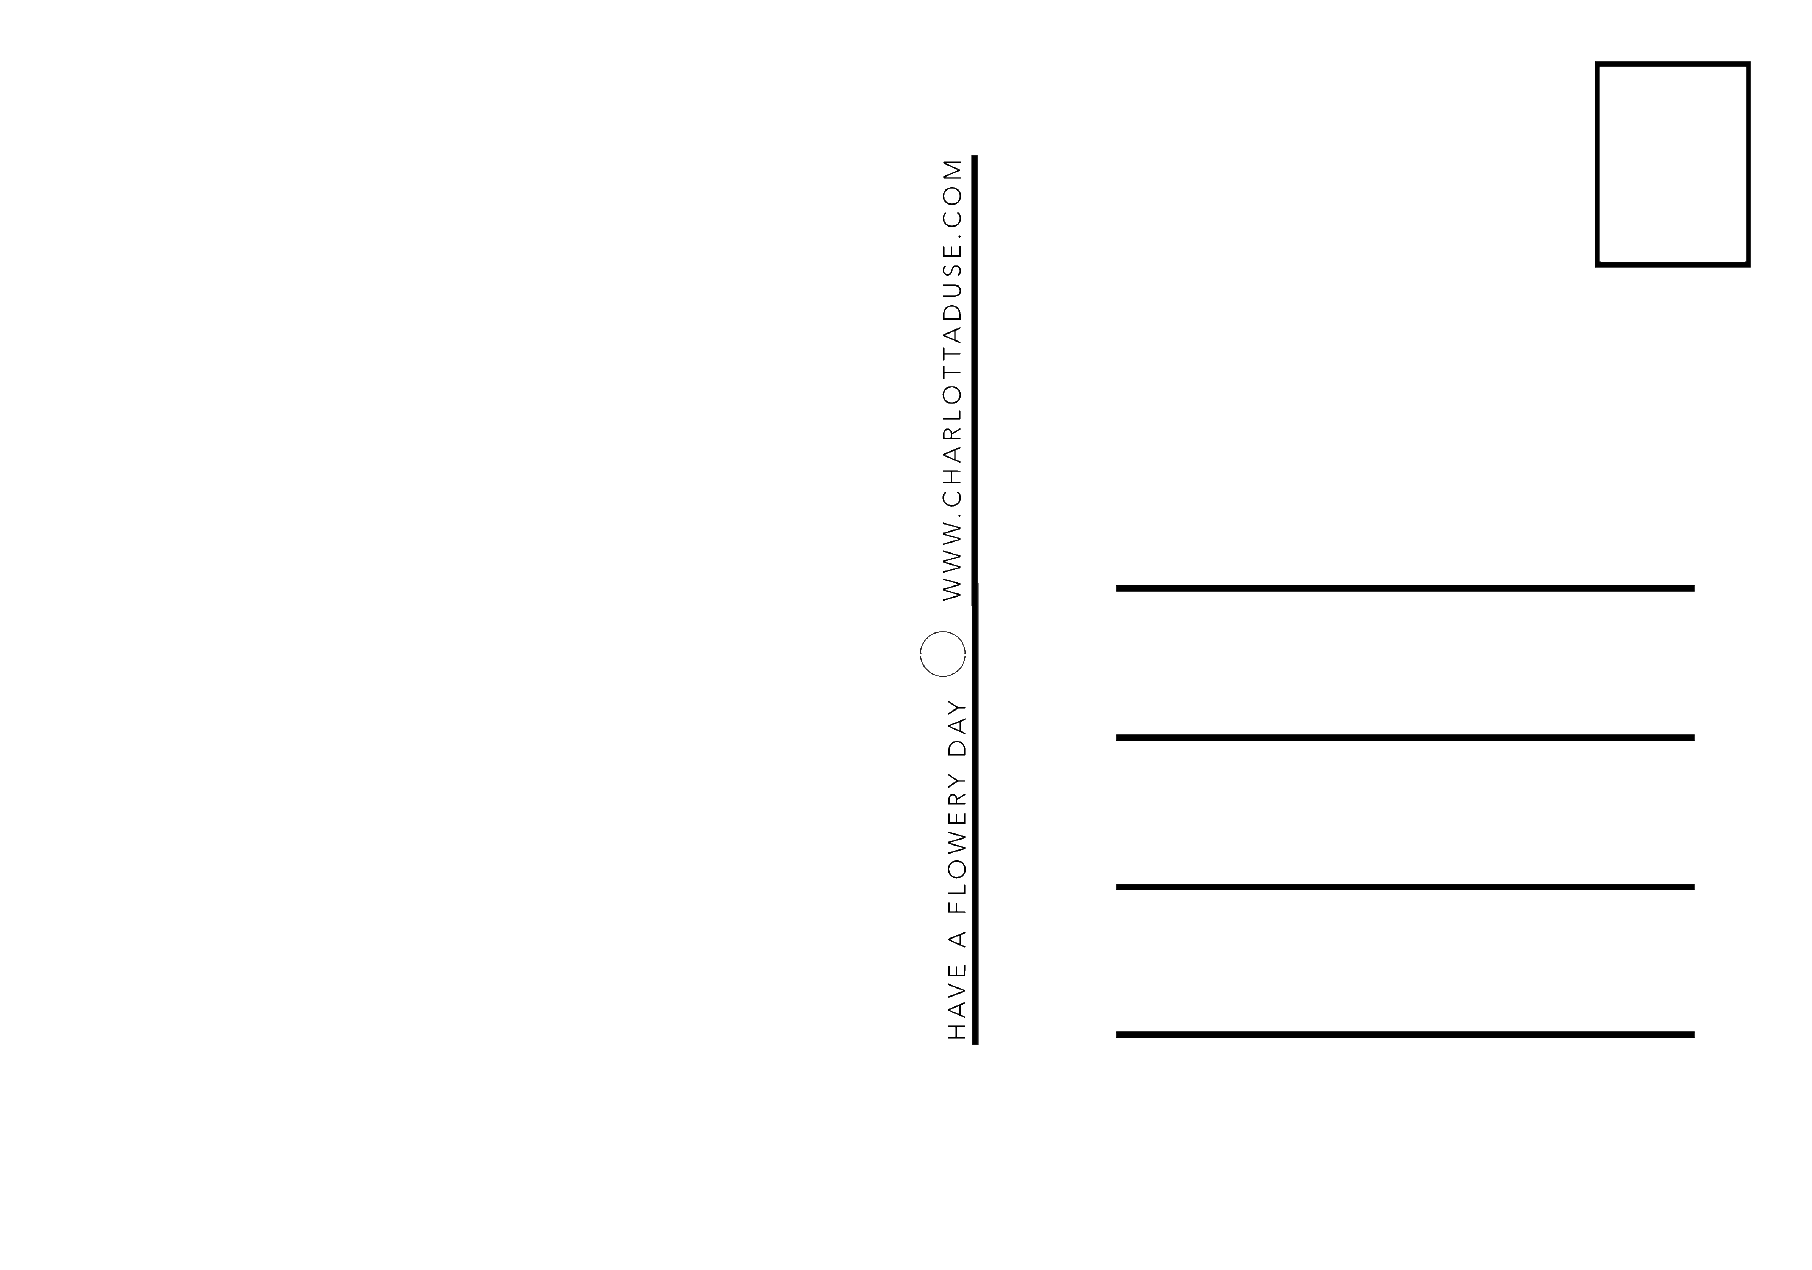

In [18]:
postcard = Image.open("vykort_pressade_blommor_baksida.png")
# https://charlottaduse.com/wp-content/uploads/2020/07/vykort_pressade_blommor_baksida.png
postcard = postcard.convert("RGBA")
postcard = np.asarray(postcard)
for i in range(postcard.shape[0]):
    for j in range(postcard.shape[1]):
        if postcard[i][j][0] > 127 and postcard[i][j][1] > 127 and postcard[i][j][2] > 127:
            postcard[i][j][3] = 0
postcard = Image.fromarray(postcard)
postcard

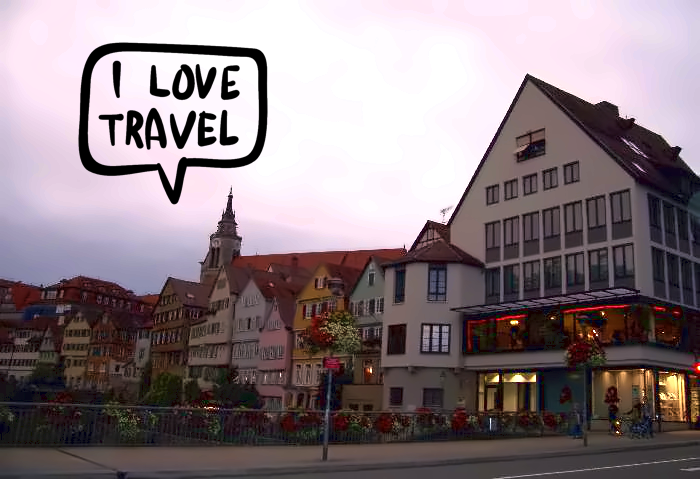

In [19]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=7, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)
final = Image.fromarray(imArray)
final.convert("RGBA")
final.paste(ilovetravel, (int((final.width - ilovetravel.width) * 0.1), int((final.height - ilovetravel.height) * 0.1)),ilovetravel)
final

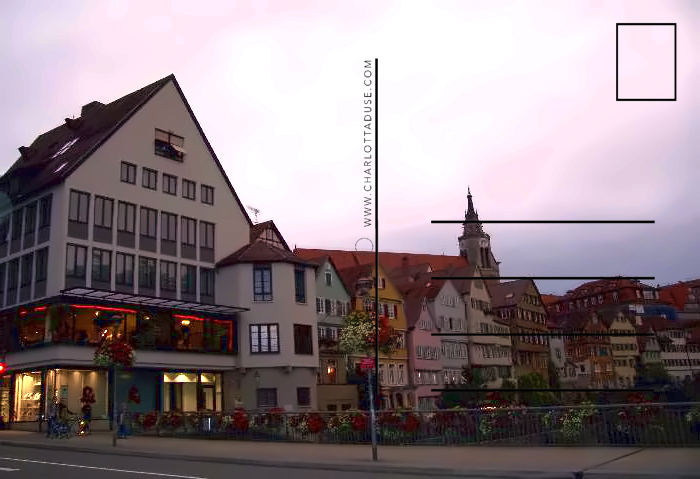

In [20]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=7, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)
final = Image.fromarray(imArray)
final.convert("RGBA")
final = final.transpose(Image.FLIP_LEFT_RIGHT)
postcard = postcard.resize((int(final.width), int(final.height)))
final.paste(postcard, (0,0),postcard)
final

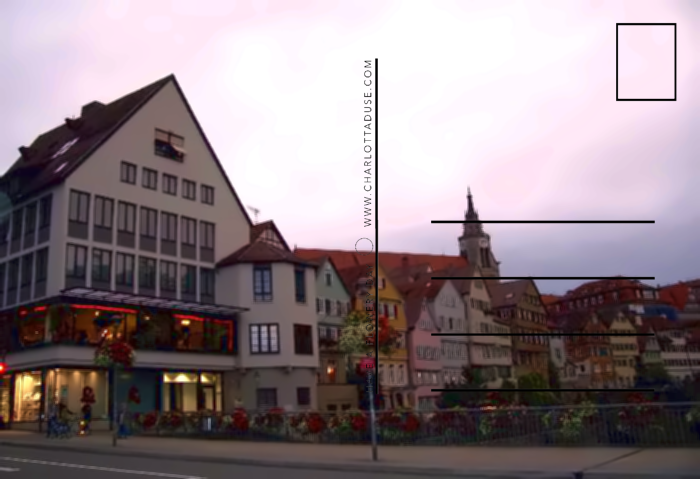

In [26]:
imArray = np.asarray(imEnhancer.enhance(1.7))
cv2.fastNlMeansDenoisingColored(imArray, imArray, h=7, hColor=7)
cv2.cvtColor(imArray, cv2.COLOR_RGB2HSV, dst=imArray)
h,s,v = cv2.split(imArray)
imArray = cv2.merge([cv2.add(h, 0),cv2.add(s, 0),cv2.add(v, 20)])
imArray = cv2.cvtColor(imArray, cv2.COLOR_HSV2RGB)
imArray = cv2.GaussianBlur(imArray, (3,3), 9)
final = Image.fromarray(imArray)
final.convert("RGBA")
final = final.transpose(Image.FLIP_LEFT_RIGHT)
notPostcard = postcard.resize((int(final.width), int(final.height)))
final.paste(notPostcard, (0,0),notPostcard)
final